## Question 1

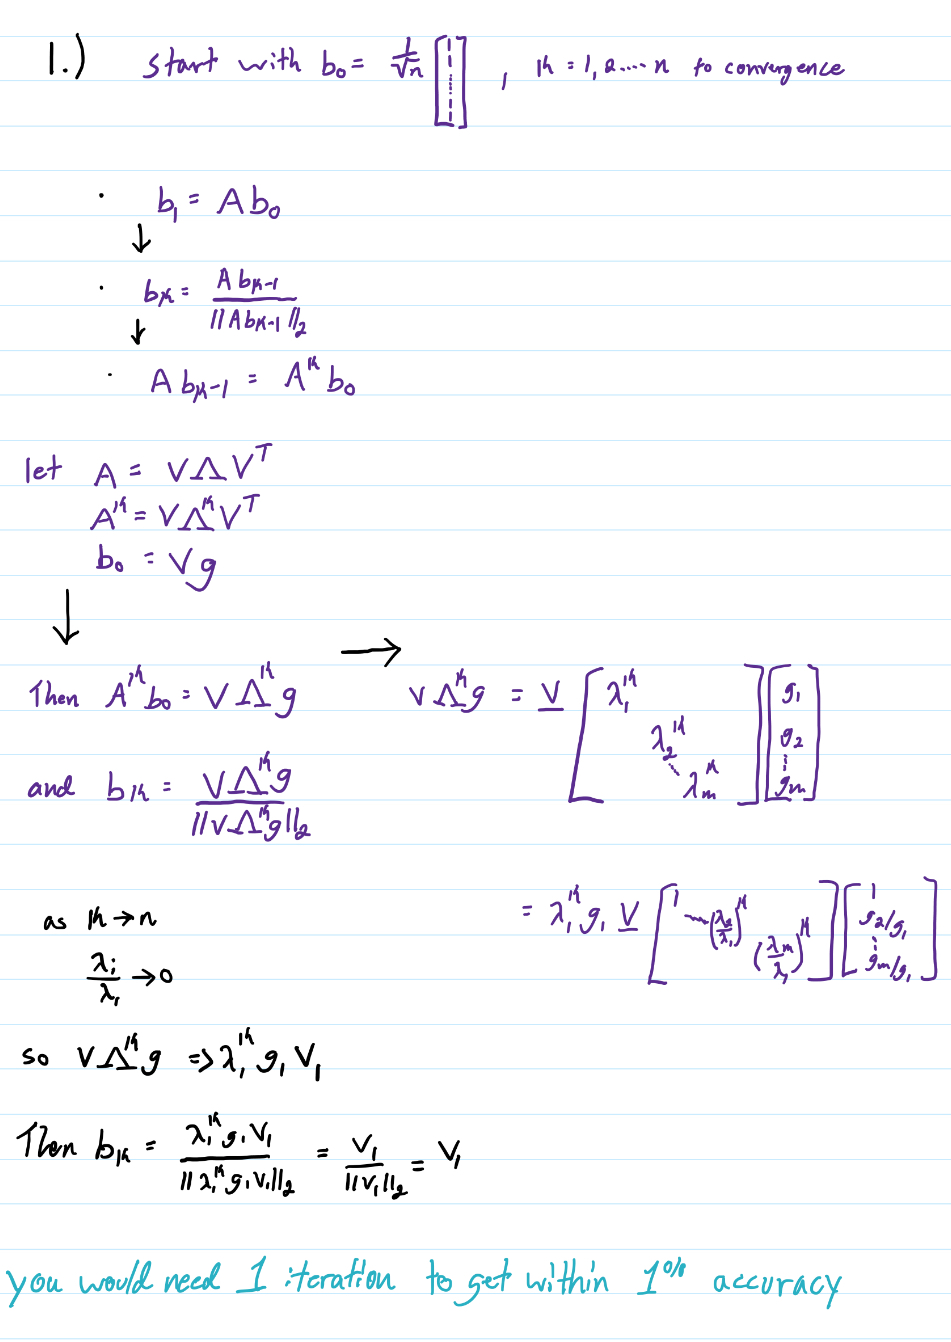

In [2]:
from IPython import display
display.Image("IMG_C42351518A9B-1.jpeg")

In [3]:
# Enable interactive rotation of graph
%matplotlib notebook

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')



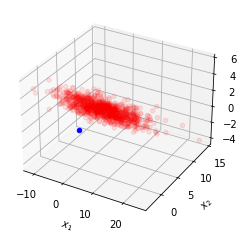

In [4]:
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [5]:
# Subtract mean
X_m = X - np.mean(X, 0)

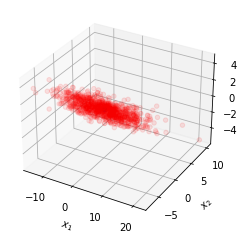

In [6]:
%matplotlib inline
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [7]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)

# complete the next line of code to assign the first principal component to a
a = VT[:,0]

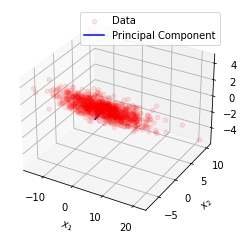

In [8]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

## Question 2

### a)
the data does not appear to be low dimensional because it can't be Approximated with a line



### b)
we could approximate the data using PCA, rank 1 matrix

### c)
yes


### d) fairly accurate capture of the data

### e) Find $w_{i}$ in terms of the SVD matrices U, S, and V

In [9]:
import numpy as np

U_reshaped = U[:,0].reshape(-1, 1)
s_reshaped = s.reshape(-1, 1)

a_1 = VT[:,0]
a_2 = VT[:,1]


w_i = (U_reshaped@s_reshaped.transpose()@a_1).reshape(-1, 1) # w_i = US^TV^T 


### f) Now write the original data $x_{i} ,i=1,2,...,1000 \text{  as }x_{i} ≈ aw_{i} +b \text{ What is b?}$

In [11]:
b = X_m - w_i@(a_1.reshape(-1, 1)).transpose()
#b is the missing data


### g)

In [12]:
E_1 =np.linalg.norm(X_m-b, 'fro')
E_1

142.05622204711017

### h)

In [16]:
w_i[0]

array([10.71186453])

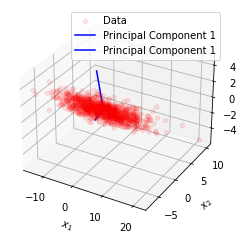

In [17]:
b_2 = X_m - a_1*w_i[0] - a_2*w_i[1]




# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component 1')

ax.plot([0,ss*a_2[0]],[0,ss*a_2[1]],[0,ss*a_2[2]], c='b',label='Principal Component 1')




ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

### i)

Does the rank-two approximation lie in a plane? Does that plane capture the dominant components of the data?

the rank 2 approximation does lie in the plane and caputures the domainant components of the data as it is along the same 3 dimensional line that the orginal data is in.

In [18]:
E_2 =np.linalg.norm(X_m-b_2, 'fro')
E_2

354.6304227330971

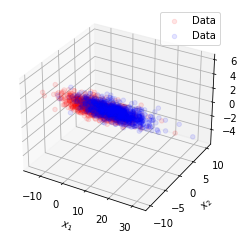

In [19]:


# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

#ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')


ax.scatter(b_2[:,0], b_2[:,1], b_2[:,2], c='b', marker='o', label='Data', alpha=0.1)


ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()



### j) 
Let E be the difference between X and the rank-two approximation. Find amathematical expression for $||E||2F$ in terms of the singular values of the mean-removed data $X_{z}$ .

## Question 3

In [20]:
import numpy as np
from scipy.io import loadmat

in_data = loadmat("face_emotion_data.mat")

X = in_data['X']
y = in_data['y']

U, p, VT = np.linalg.svd(X, full_matrices=False)
s = p.reshape(-1, 1)


def classifiers(L=0, part_a=True):
    I = np.identity(2, dtype=float)
    err_list = []
    
    for i in range(56):
        start_index = (1 + i) * 16
        end_index = (2 + i) * 16

        X_train = np.vstack((X[0:start_index, :], X[end_index:-1, :]))
        y_train = np.vstack((y[0:start_index, :], y[end_index:-1, :]))

        X_val = X[start_index:end_index, :]
        y_val = y[start_index:end_index, :]

        for r in range(1, 10):  # Start from 1, as 0 will cause division by zero errors
            
            # a) part_a == True, b) part_a == False
            w = VT[:r, :].transpose() @ np.linalg.inv(np.diag(s[:r, 0])) @ U[:, :r].transpose()

            y_predict = np.sign(X_val @ w)
            
            # Check for empty slices before computing the mean
            if np.isnan(np.mean(y_val != y_predict)):
                err_list.append(0.0)  # Set the error rate to 0 for empty slices
            else:
                err_list.append(np.mean(y_val != y_predict))

    avg_err = np.mean(err_list)
    return "Average error rate is %.2f%%" % (avg_err * 100)


print(classifiers())
print("the Truncated SVD is better in this case")

Average error rate is 6.30%
the Truncated SVD is better in this case


/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/Cellar/jupyterlab/3.4.3/libexec/lib/python3.10/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
